<a href="https://colab.research.google.com/github/pratyush981/Super-Image-Resolution-using-DIV2K/blob/main/image_super_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Create a directory for the dataset
os.makedirs('div2k', exist_ok=True)

# Extract the zip files
with zipfile.ZipFile('DIV2K_train_LR_bicubic_X2.zip', 'r') as zip_ref:
    zip_ref.extractall('div2k')

with zipfile.ZipFile('DIV2K_valid_LR_bicubic_X2.zip', 'r') as zip_ref:
    zip_ref.extractall('div2k')

with zipfile.ZipFile('DIV2K_train_HR.zip', 'r') as zip_ref:
    zip_ref.extractall('div2k')

with zipfile.ZipFile('DIV2K_valid_HR.zip', 'r') as zip_ref:
    zip_ref.extractall('div2k')

# Verify extraction
for root, dirs, files in os.walk('div2k'):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))


div2k/DIV2K_train_LR_bicubic
div2k/DIV2K_valid_LR_bicubic
div2k/DIV2K_valid_HR
div2k/DIV2K_train_HR
div2k/DIV2K_train_LR_bicubic/X2
div2k/DIV2K_train_LR_bicubic/X2/0309x2.png
div2k/DIV2K_train_LR_bicubic/X2/0337x2.png
div2k/DIV2K_train_LR_bicubic/X2/0144x2.png
div2k/DIV2K_train_LR_bicubic/X2/0672x2.png
div2k/DIV2K_train_LR_bicubic/X2/0751x2.png
div2k/DIV2K_train_LR_bicubic/X2/0284x2.png
div2k/DIV2K_train_LR_bicubic/X2/0186x2.png
div2k/DIV2K_train_LR_bicubic/X2/0356x2.png
div2k/DIV2K_train_LR_bicubic/X2/0234x2.png
div2k/DIV2K_train_LR_bicubic/X2/0310x2.png
div2k/DIV2K_train_LR_bicubic/X2/0530x2.png
div2k/DIV2K_train_LR_bicubic/X2/0591x2.png
div2k/DIV2K_train_LR_bicubic/X2/0436x2.png
div2k/DIV2K_train_LR_bicubic/X2/0333x2.png
div2k/DIV2K_train_LR_bicubic/X2/0076x2.png
div2k/DIV2K_train_LR_bicubic/X2/0511x2.png
div2k/DIV2K_train_LR_bicubic/X2/0686x2.png
div2k/DIV2K_train_LR_bicubic/X2/0617x2.png
div2k/DIV2K_train_LR_bicubic/X2/0167x2.png
div2k/DIV2K_train_LR_bicubic/X2/0088x2.png
div2k/DI

In [ ]:

!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip


--2024-08-09 18:24:01--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip [following]
--2024-08-09 18:24:01--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 925390592 (883M) [application/zip]
Saving to: ‘DIV2K_train_LR_bicubic_X2.zip’

DIV2K_train_LR_bicu 100%[===================>] 882.52M  25.2MB/s    in 37s     

2024-08-09 18:24:39 (23.7 MB/s) - ‘DIV2K_train_LR_bicubic_X2.zip’ saved [925390592/925390592]

--2024-08-09 18:24:39--  http://data.vision.ee.ethz.ch/cvl/DIV2K

Loaded 800 high-resolution images.
Loaded 800 low-resolution images.


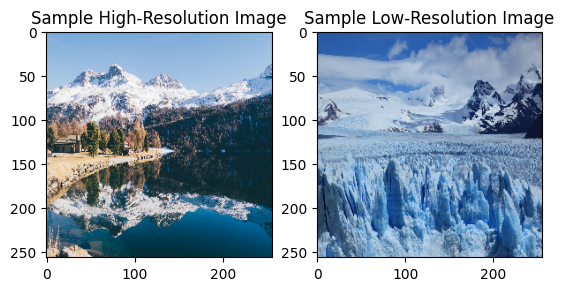

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return np.array(images)

# Directories for high-resolution and low-resolution images
train_hr_dir = 'div2k/DIV2K_train_HR/DIV2K_train_HR'

# Load high-resolution and low-resolution images
high_res_images = load_images_from_folder("div2k/DIV2K_train_HR/DIV2K_train_HR")
low_res_images = load_images_from_folder("div2k/DIV2K_train_HR/DIV2K_train_HR")

print(f"Loaded {high_res_images.shape[0]} high-resolution images.")
print(f"Loaded {low_res_images.shape[0]} low-resolution images.")

# Display sample images
if high_res_images.shape[0] > 0:
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(high_res_images[10], cv2.COLOR_BGR2RGB))
    plt.title('Sample High-Resolution Image')

if low_res_images.shape[0] > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(low_res_images[0], cv2.COLOR_BGR2RGB))
    plt.title('Sample Low-Resolution Image')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming high_res_images and low_res_images are numpy arrays
X_train, X_val, Y_train, Y_val = train_test_split(low_res_images, high_res_images, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

Training set: 640 samples
Validation set: 160 samples


In [ ]:
def build_srcnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(64, (9, 9), activation='relu', padding='same'))
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(Conv2D(3, (5, 5), activation='sigmoid', padding='same'))  # Change output channels to 3
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

input_shape = (256, 256, 3)  # Adjust based on your image dimensions and channels
model = build_srcnn_model(input_shape)


In [ ]:
import cv2

def convert_to_grayscale(images):
    grayscale_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(gray_img[..., np.newaxis])  # Add channel dimension
    return np.array(grayscale_images)

# Convert images to grayscale
high_res_images_gray = convert_to_grayscale(high_res_images)
low_res_images_gray = convert_to_grayscale(low_res_images)

# Split the grayscale images into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(low_res_images_gray, high_res_images_gray, test_size=0.2, random_state=42)

# Normalize grayscale images
X_train = X_train / 255.0
Y_train = Y_train / 255.0
X_val = X_val / 255.0
Y_val = Y_val / 255.0

# Build and train the model
input_shape = (256, 256, 1)  # Grayscale images
model = build_srcnn_model(input_shape)
history = model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_data=(X_val, Y_val))


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - loss: 0.0533 - val_loss: 0.0121
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - loss: 0.0098 - val_loss: 0.0075
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0055 - val_loss: 0.0216
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0017 - val_loss: 0.0015


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0015
Validation Loss: 0.0014857385540381074


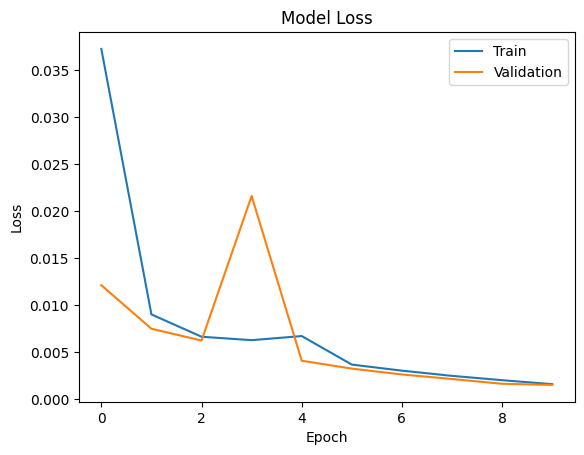

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model
val_loss = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}")

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to target size
    image_resized = cv2.resize(image, target_size)

    # Convert image to float32 for normalization
    image_resized = image_resized.astype(np.float32)

    # Normalize pixel values to [0, 1]
    image_normalized = image_resized / 255.0

    return image_normalized

# Load and preprocess the test image
test_image_path = 'div2k/DIV2K_train_HR/DIV2K_train_HR/0339.png'
test_image = load_and_preprocess_image(test_image_path, target_size=(1920, 1080))

# Convert the image to 8-bit format and then to grayscale
test_image_8bit = (test_image * 255).astype(np.uint8)
test_image_gray = cv2.cvtColor(test_image_8bit, cv2.COLOR_BGR2GRAY)
test_image_gray = np.expand_dims(test_image_gray, axis=-1)  # Add channel dimension
test_image_gray = np.expand_dims(test_image_gray, axis=0)  # Add batch dimension

# Predict
predicted_image = model.predict(test_image_gray)

# Postprocess and display the result
predicted_image = np.squeeze(predicted_image)  # Remove batch dimension
plt.imshow(predicted_image, cmap='gray')
plt.title('Predicted Image')
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
print("Predicted image shape before squeeze:", predicted_image.shape)
predicted_image = np.squeeze(predicted_image)
print("Predicted image shape after squeeze:", predicted_image.shape)

Predicted image shape before squeeze: (256, 256, 3)
Predicted image shape after squeeze: (256, 256, 3)


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Get the filename of the uploaded image
input_image_path = next(iter(uploaded))

# Load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load and preprocess the image
test_image = load_and_preprocess_image(input_image_path)

# Convert the image to grayscale
test_image_gray = np.expand_dims(test_image, axis=-1)  # Add channel dimension if not already


Saving 0007.png to 0007 (1).png


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D

def create_super_resolution_model():
    model = Sequential()

    # Add layers
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(None, None, 1)))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (3, 3), padding='same', activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Create the model
model = create_super_resolution_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Assuming X_train and Y_train are your training data and labels (low-res and high-res images)
# X_train should be low-resolution images, Y_train should be high-resolution images
history = model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.1)


NameError: name 'X_train' is not defined

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return np.array(images)

# Load high-resolution images (Y_train)
hr_folder = '/content/high_resolution_images'  # Update with your HR image folder
Y_train = load_images_from_folder(hr_folder)

# Load low-resolution images (X_train)
lr_folder = '/content/low_resolution_images'  # Update with your LR image folder
X_train = load_images_from_folder(lr_folder)

# Convert to grayscale if the model expects 1 channel
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_train])
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

Y_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in Y_train])
Y_train = np.expand_dims(Y_train, axis=-1)  # Add channel dimension

# Normalize the images (optional)
X_train = X_train.astype('float32') / 255.0
Y_train = Y_train.astype('float32') / 255.0


FileNotFoundError: [Errno 2] No such file or directory: '/content/high_resolution_images'